<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-19-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [90]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-18,1499722,84640,19564.0,786.0
2020-05-19,1520778,86070,21056.0,1430.0
2020-05-20,1542309,87472,21531.0,1402.0


In [91]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-05-20,CA,84057,1296063,0,4681.0,0.0,1345.0,0.0,0.0,0.0,0.0,B,5/20/2020 00:00,6be7a20ccb8deab94178b9db3e70d2c1cf2147c7,2020-05-20T20:00:00Z,3436,0.0,1380120,1380120,1380120,06,102.0,0.0,38542.0,2262.0,40804.0
61,2020-05-19,CA,81795,1257521,0,4363.0,0.0,1307.0,0.0,0.0,0.0,0.0,B,5/19/2020 00:00,ad1044e4a2c384424aa492acbe2154e655566e10,2020-05-19T20:00:00Z,3334,0.0,1339316,1339316,1339316,06,32.0,0.0,45279.0,1365.0,46644.0
117,2020-05-18,CA,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,a4c726f97ca716cb19c945927806f45e0bb3cbea,2020-05-18T20:00:00Z,3302,0.0,1292672,1292672,1292672,06,41.0,0.0,55838.0,1591.0,57429.0
173,2020-05-17,CA,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,efe3d2e04569547fc50e7c3d8084f6f4ea4d4cc7,2020-05-17T20:00:00Z,3261,0.0,1235243,1235243,1235243,06,57.0,0.0,54071.0,2046.0,56117.0
229,2020-05-16,CA,76793,1102333,0,4424.0,0.0,1313.0,0.0,0.0,0.0,0.0,B,5/16/2020 00:00,e335473bcecc2092fc63063fe12ed043c5f73751,2020-05-16T20:00:00Z,3204,0.0,1179126,1179126,1179126,06,96.0,0.0,43363.0,1857.0,45220.0


In [92]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1542309
Total deaths = 87472


,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,2020-05-20,354370,1151466,0,5570.0,76410.0,1836.0,0.0,1421.0,0.0,61886.0,A,5/20/2020 00:00,00a412db192eec4248dc52194da0117cc8819e2a,2020-05-20T20:00:00Z,22976,76410.0,1505836,1505836,1505836,36,133.0,242.0,36572.0,1525.0,38097.0
NJ,2020-05-20,150399,380944,0,3405.0,0.0,969.0,0.0,750.0,0.0,23945.0,A+,5/20/2020 13:00,76a32369f16763bc8b9c6061998dde4298477d12,2020-05-20T20:00:00Z,10747,0.0,531343,531343,531343,34,161.0,0.0,9775.0,1386.0,11161.0
IL,2020-05-20,100418,542295,0,3914.0,0.0,1005.0,0.0,554.0,0.0,0.0,A,5/20/2020 00:00,e9662e68250154ce3144193073d08e9fdb4272cc,2020-05-20T20:00:00Z,4525,0.0,642713,642713,642713,17,146.0,0.0,18641.0,2388.0,21029.0
MA,2020-05-20,88970,400983,0,2518.0,8897.0,675.0,0.0,0.0,0.0,0.0,A,5/20/2020 10:00,dc7f6504182e05be1016791a23d13850fe30b54c,2020-05-20T20:00:00Z,6066,8897.0,489953,489953,489953,25,128.0,131.0,11968.0,1045.0,13013.0
CA,2020-05-20,84057,1296063,0,4681.0,0.0,1345.0,0.0,0.0,0.0,0.0,B,5/20/2020 00:00,6be7a20ccb8deab94178b9db3e70d2c1cf2147c7,2020-05-20T20:00:00Z,3436,0.0,1380120,1380120,1380120,06,102.0,0.0,38542.0,2262.0,40804.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [94]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
113,2020-05-14,1410105,10378046,80251,26931.0,1908.0,0.914282
114,2020-05-15,1434478,10739591,81729,24373.0,1478.0,0.930085
115,2020-05-16,1459421,11092529,83015,24943.0,1286.0,0.946257
116,2020-05-17,1480158,11496488,83854,20737.0,839.0,0.959703
117,2020-05-18,1499722,11834508,84640,19564.0,786.0,0.972388
118,2020-05-19,1520778,12233987,86070,21056.0,1430.0,0.986040
119,2020-05-20,1542309,12647791,87472,21531.0,1402.0,1.000000


In [95]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
71,2020-05-14,73164,1104651,3032,2023.0,98.0,0.870409
72,2020-05-15,74936,1133906,3108,1772.0,76.0,0.891490
73,2020-05-16,76793,1179126,3204,1857.0,96.0,0.913582
74,2020-05-17,78839,1235243,3261,2046.0,57.0,0.937923
75,2020-05-18,80430,1292672,3302,1591.0,41.0,0.956851
76,2020-05-19,81795,1339316,3334,1365.0,32.0,0.973090
77,2020-05-20,84057,1380120,3436,2262.0,102.0,1.000000


In [96]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-16,1459421,9633108,3788,42896.0,155726.0,10509.0,6945.0,5529.0,592.0,268376.0,83015,155726.0,11096317,11092529,11092529,1286.0,1860.0,327995.0,24943.0,352938.0
2020-05-17,1480158,10016330,3449,41108.0,156905.0,10164.0,7003.0,5467.0,593.0,272265.0,83854,156905.0,11499937,11496488,11496488,839.0,1179.0,383222.0,20737.0,403959.0
2020-05-18,1499722,10334786,3596,40933.0,157963.0,10015.0,7064.0,5257.0,602.0,283178.0,84640,157963.0,11838104,11834508,11834508,786.0,1058.0,318456.0,19564.0,338020.0
2020-05-19,1520778,10713209,2944,41174.0,159634.0,9829.0,7217.0,5032.0,606.0,289392.0,86070,159634.0,12236931,12233987,12233987,1430.0,1671.0,378423.0,21056.0,399479.0
2020-05-20,1542309,11105482,2973,40884.0,161616.0,9829.0,7319.0,4911.0,613.0,294312.0,87472,161616.0,12650764,12647791,12647791,1402.0,1982.0,392273.0,21531.0,413804.0


In [97]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-16,76793,1102333,0,4424.0,0.0,1313.0,0.0,0.0,0.0,0.0,3204,0.0,1179126,1179126,1179126,96.0,0.0,43363.0,1857.0,45220.0
2020-05-17,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,3261,0.0,1235243,1235243,1235243,57.0,0.0,54071.0,2046.0,56117.0
2020-05-18,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,3302,0.0,1292672,1292672,1292672,41.0,0.0,55838.0,1591.0,57429.0
2020-05-19,81795,1257521,0,4363.0,0.0,1307.0,0.0,0.0,0.0,0.0,3334,0.0,1339316,1339316,1339316,32.0,0.0,45279.0,1365.0,46644.0
2020-05-20,84057,1296063,0,4681.0,0.0,1345.0,0.0,0.0,0.0,0.0,3436,0.0,1380120,1380120,1380120,102.0,0.0,38542.0,2262.0,40804.0


In [98]:
rn = gbState.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

7.599995923139533

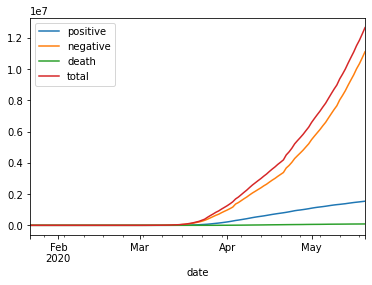

In [99]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

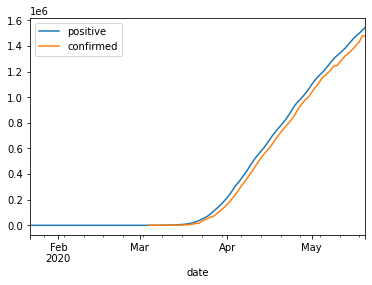

In [100]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [101]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1528568
dead           91921
dtype: int64

In [102]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    83752
dead          3403
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [104]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1528568
Russia             299941
Brazil             271885
United Kingdom     250138
Spain              232037
Italy              226699
France             180933
Germany            177778
Turkey             151615
Iran               124603
Name: confirmed, dtype: int64

In [105]:
dfctd_state_curr.head()

,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2020-05-20,402,36643,0,16.0,0.0,0.0,0.0,0.0,0.0,352.0,C,5/20/2020 00:00,fbd2c4d7f2f9bb5886519ca013a5582d05a2322c,2020-05-20T20:00:00Z,10,0.0,37045,37045,37045,02,0.0,0.0,662.0,3.0,665.0
AL,2020-05-20,12744,151706,0,0.0,1493.0,0.0,524.0,0.0,309.0,0.0,B,5/19/2020 00:00,fc74b5a0d85554eb568628788cfab89828235631,2020-05-20T20:00:00Z,517,1493.0,164450,164450,164450,01,13.0,40.0,6516.0,368.0,6884.0
AR,2020-05-20,5003,91255,0,78.0,535.0,0.0,0.0,14.0,101.0,3852.0,A,5/20/2020 00:00,8cf09ad59fe07fd22c8d7872f13e6a89e2330024,2020-05-20T20:00:00Z,107,535.0,96258,96258,96258,05,5.0,0.0,2477.0,80.0,2557.0
AS,2020-05-20,0,124,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,5/19/2020 00:00,b17187aa654adddc868eec1438cbfceb53964c13,2020-05-20T20:00:00Z,0,0.0,124,124,124,60,0.0,0.0,0.0,0.0,0.0
AZ,2020-05-20,14897,150538,0,810.0,1792.0,298.0,0.0,208.0,0.0,3773.0,A+,5/20/2020 00:00,b1b84c773495f600cdad6b1e420d1c25d58354cc,2020-05-20T20:00:00Z,747,1792.0,165435,165435,165435,04,43.0,46.0,3533.0,331.0,3864.0


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [108]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-20,47471,2173,47471,1.000000
FL,2020-05-19,46944,2129,47471,0.988898
FL,2020-05-18,46442,2073,47471,0.978324
FL,2020-05-17,45588,2049,47471,0.960334
FL,2020-05-16,44811,2040,47471,0.943966
FL,2020-05-15,43210,1991,47471,0.910240
FL,2020-05-14,43210,1948,47471,0.910240


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

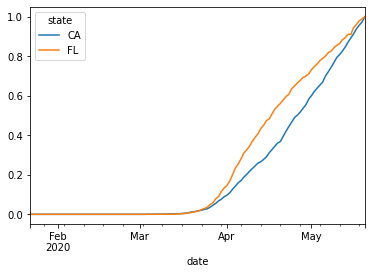

In [110]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

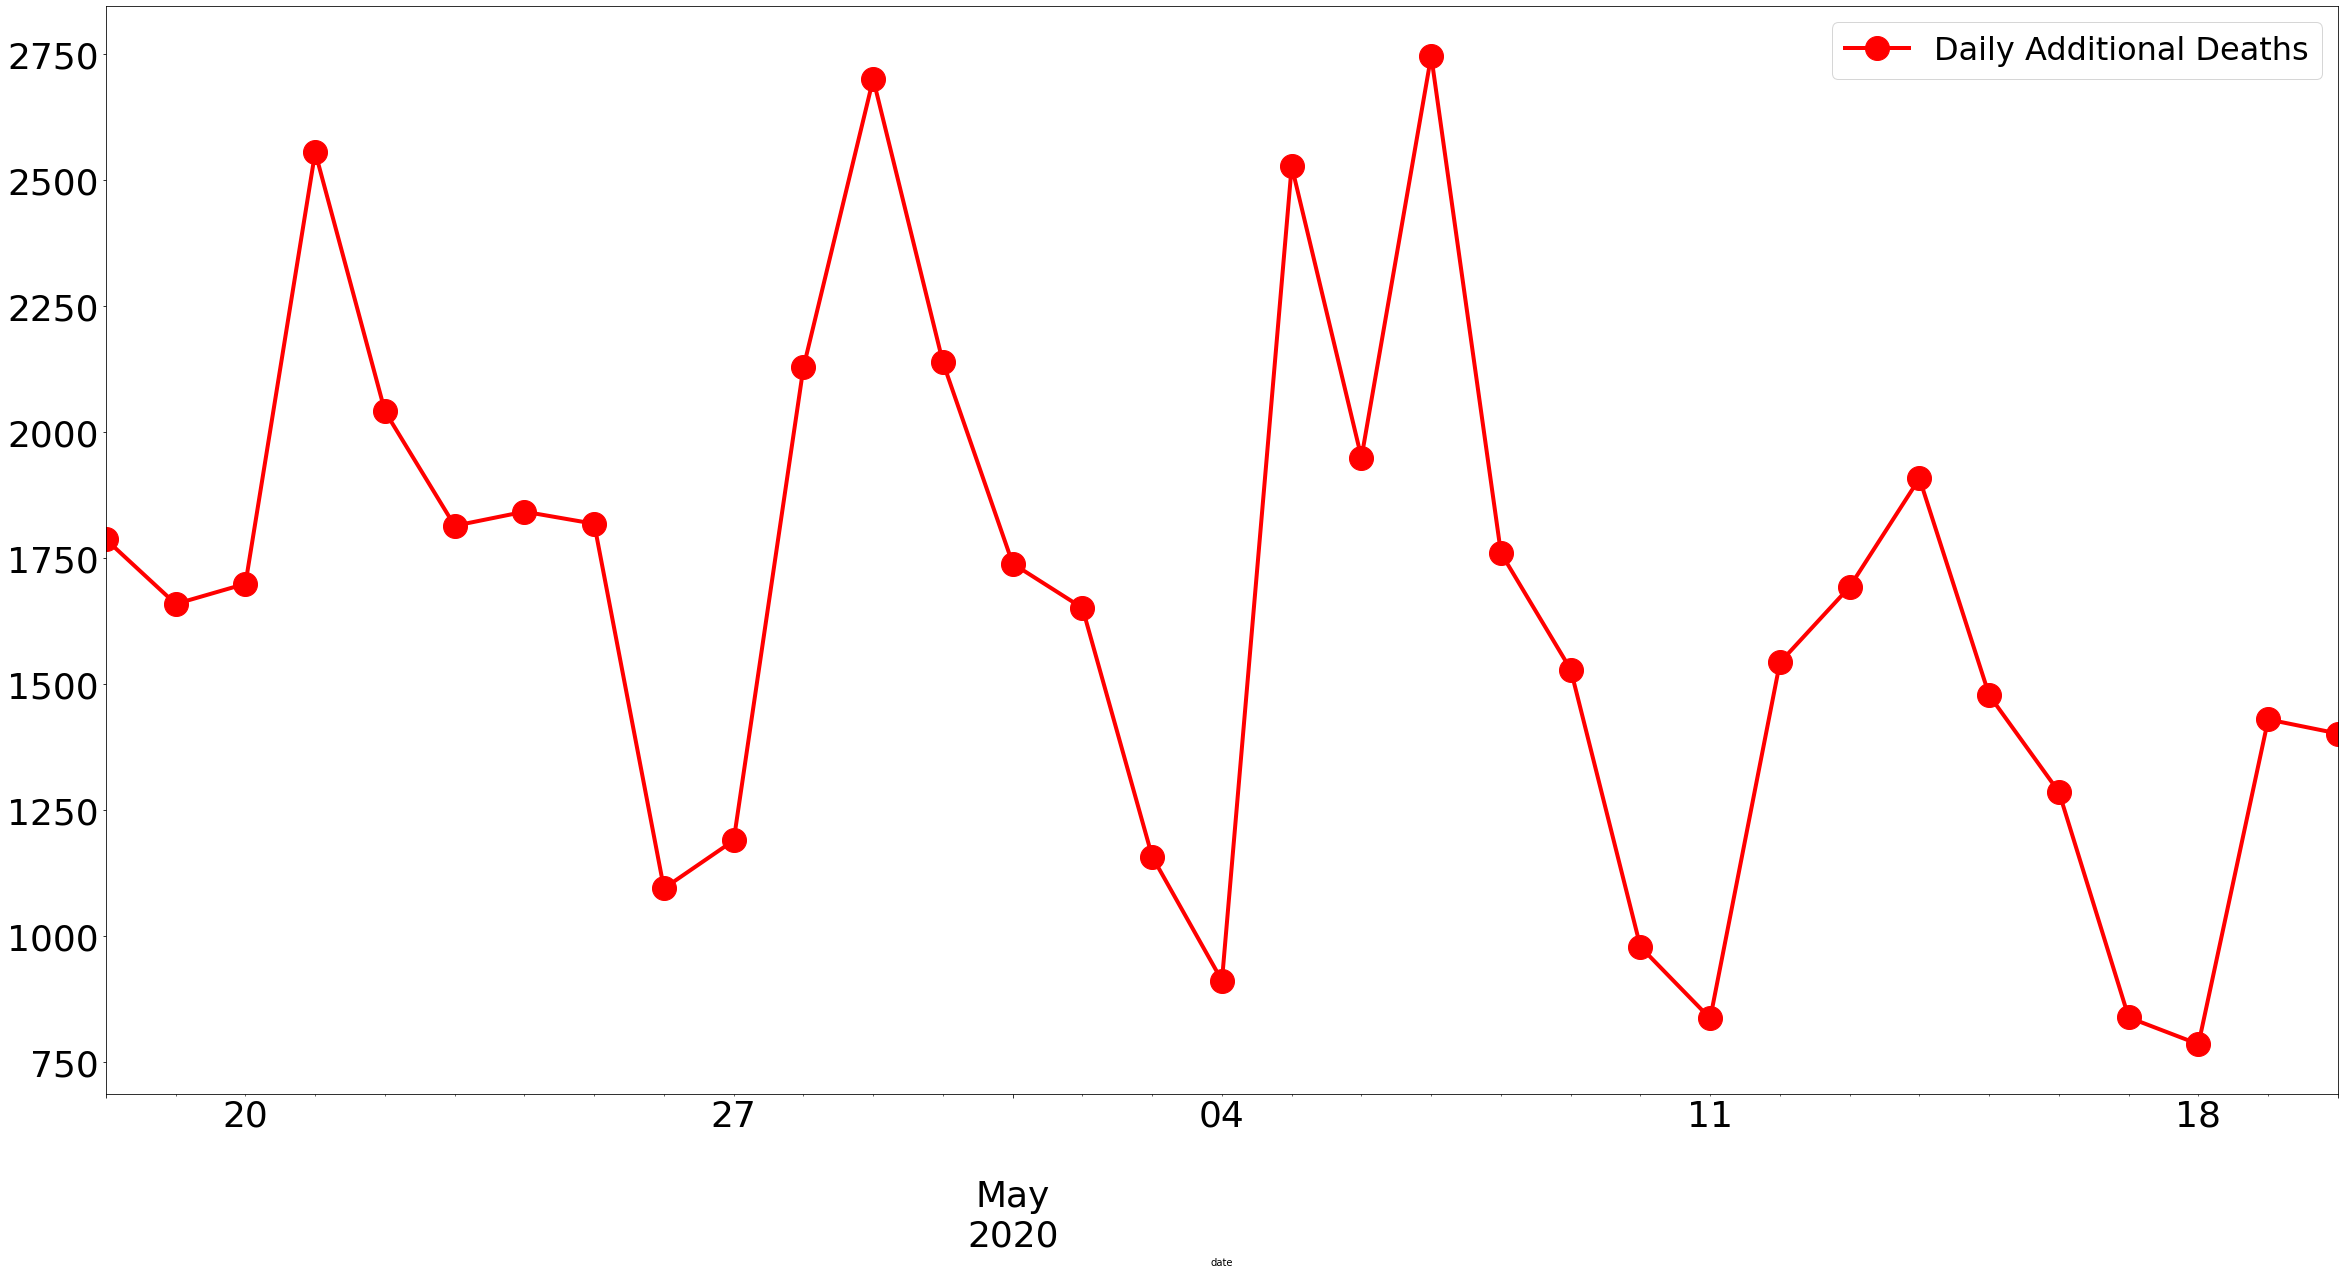

In [112]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


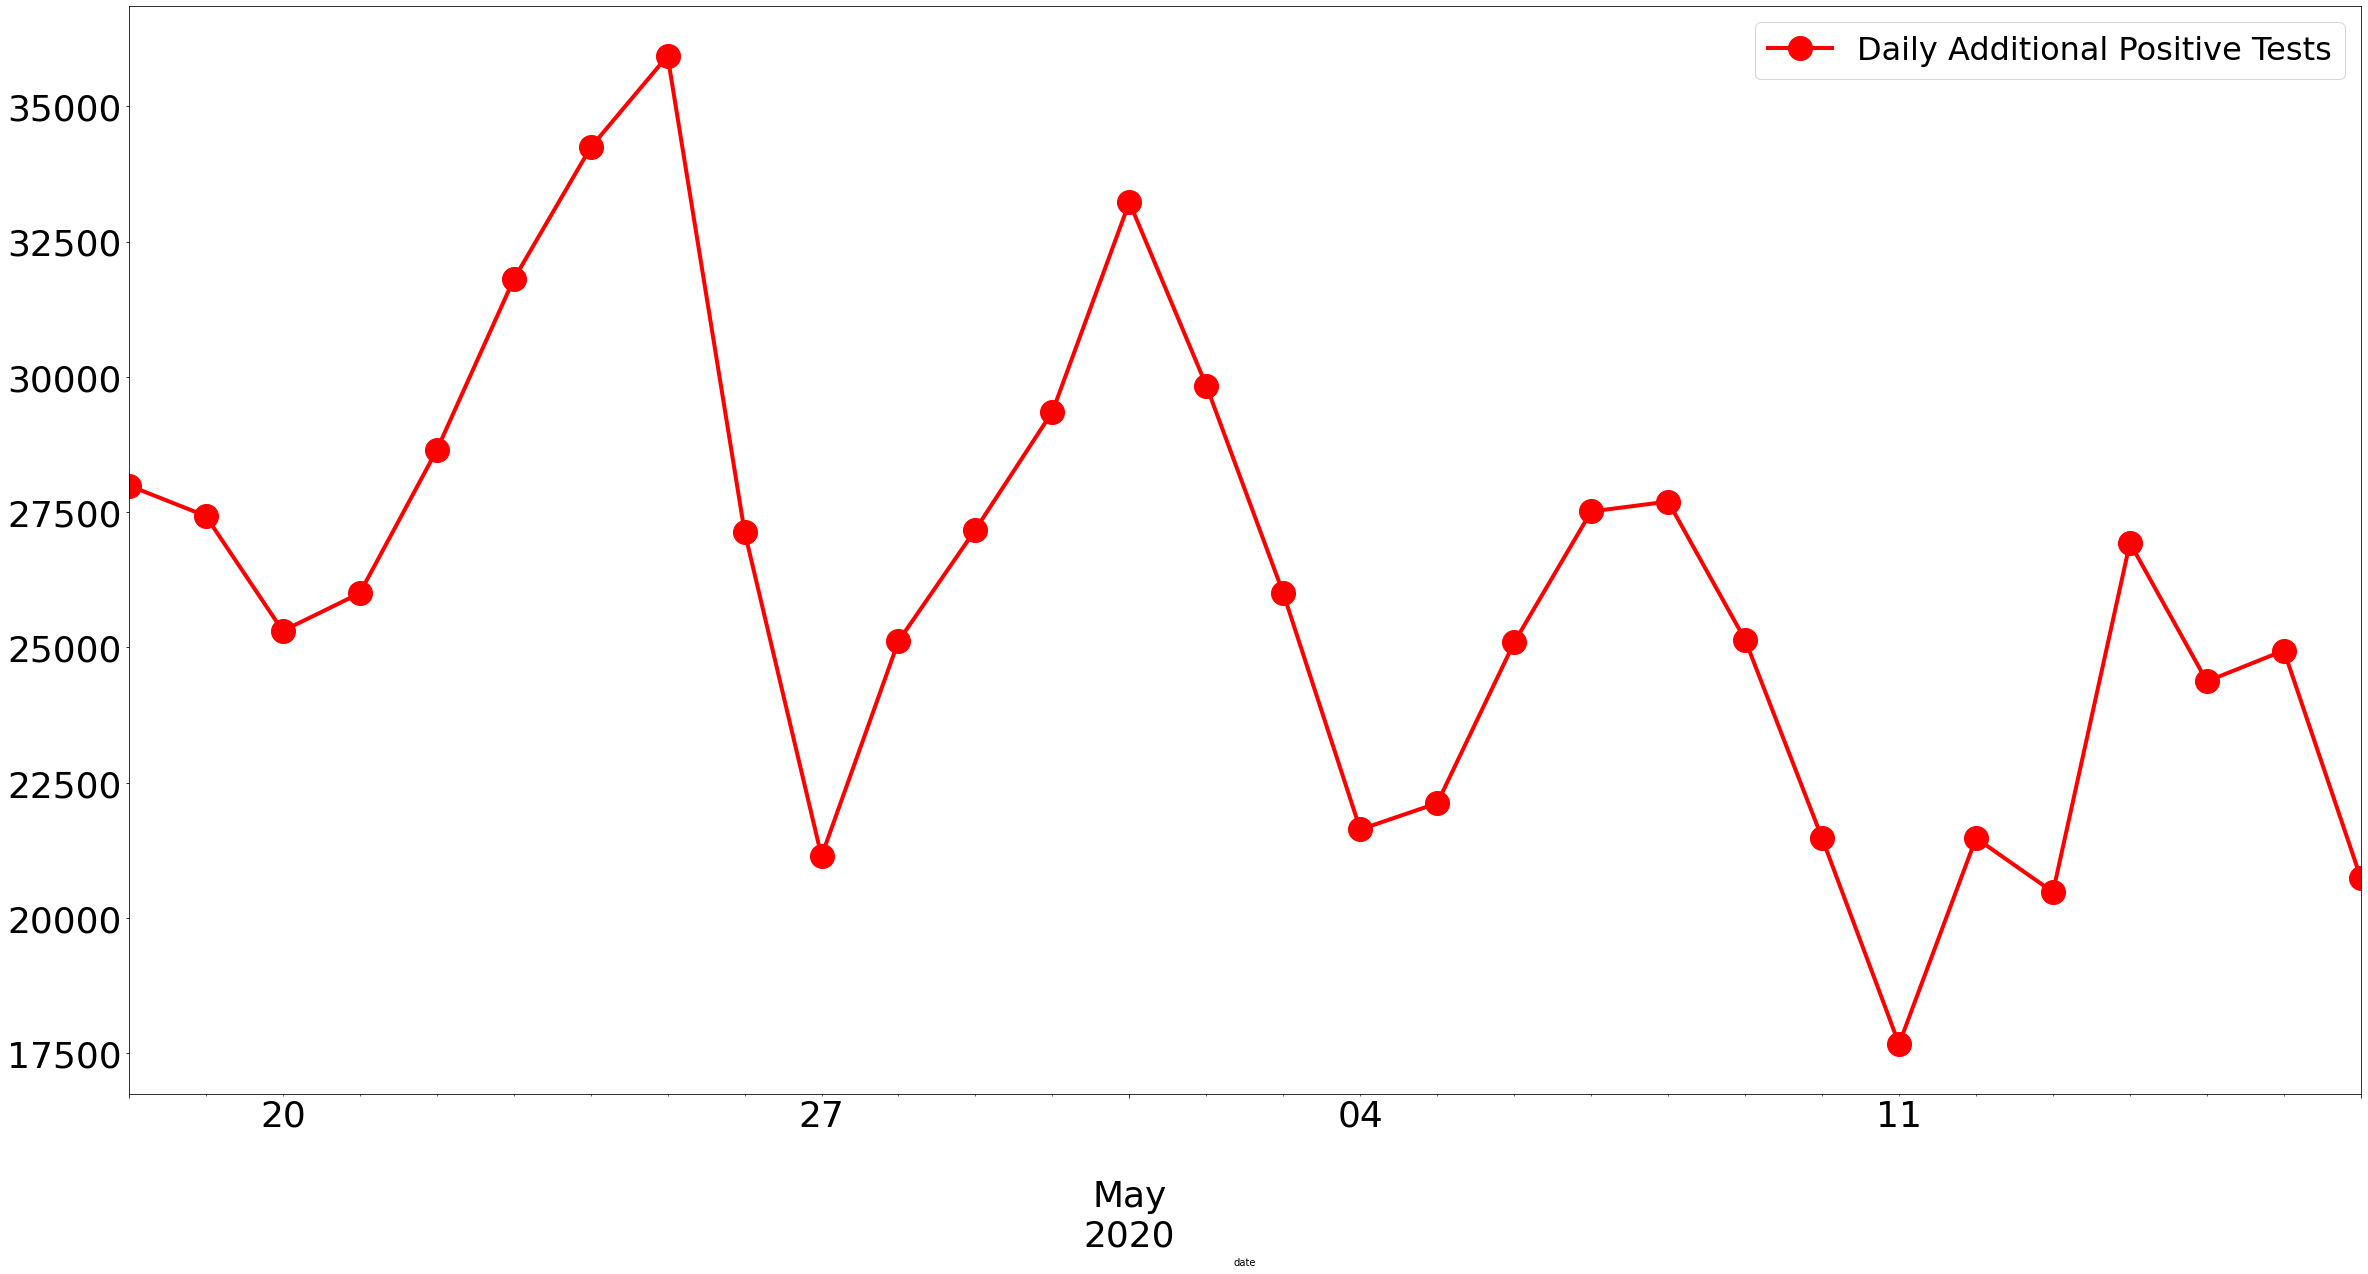

In [113]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:-3].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


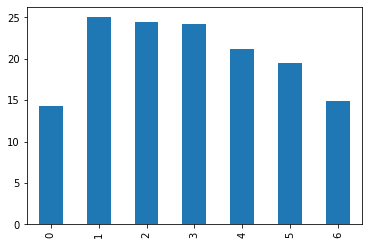

In [116]:
dfDoW.mean().deathIncrease.plot.bar()



In [117]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202015,12523.0,22930.0,835148.0,217015.0,1052163.0
202016,14063.0,21844.0,843853.0,199864.0,1043717.0
202017,12864.0,18239.0,1320695.0,209059.0,1529754.0
202018,12704.0,24854.0,1462229.0,191855.0,1654084.0
202019,12402.0,18984.0,1744751.0,170677.0,1906115.0
202020,9584.0,12125.0,2362886.0,156609.0,2519495.0
202021,3618.0,4711.0,1089152.0,62151.0,1151303.0


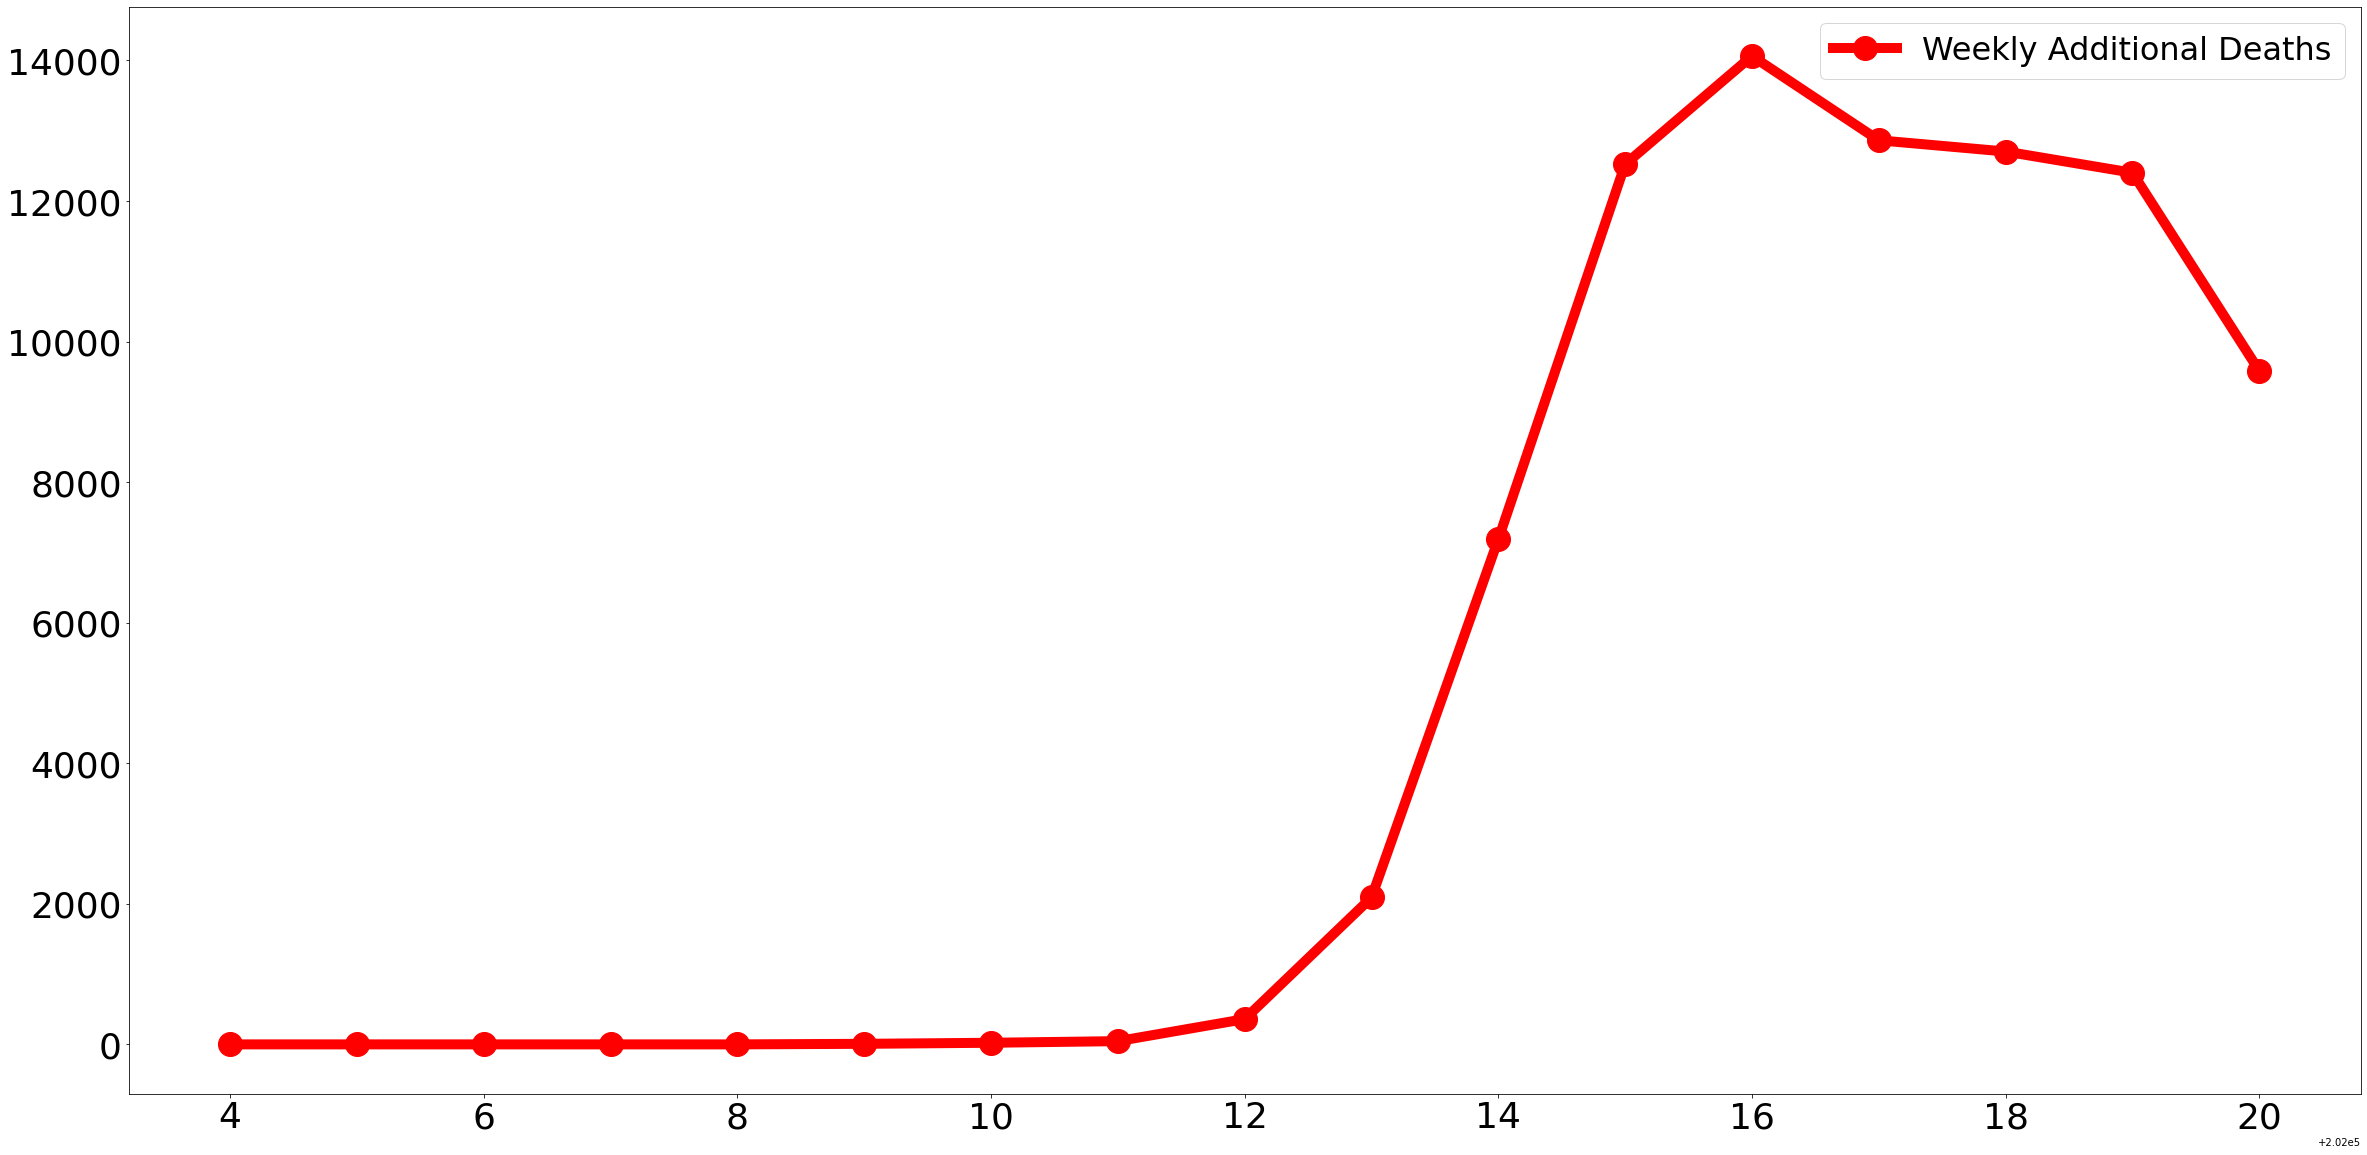

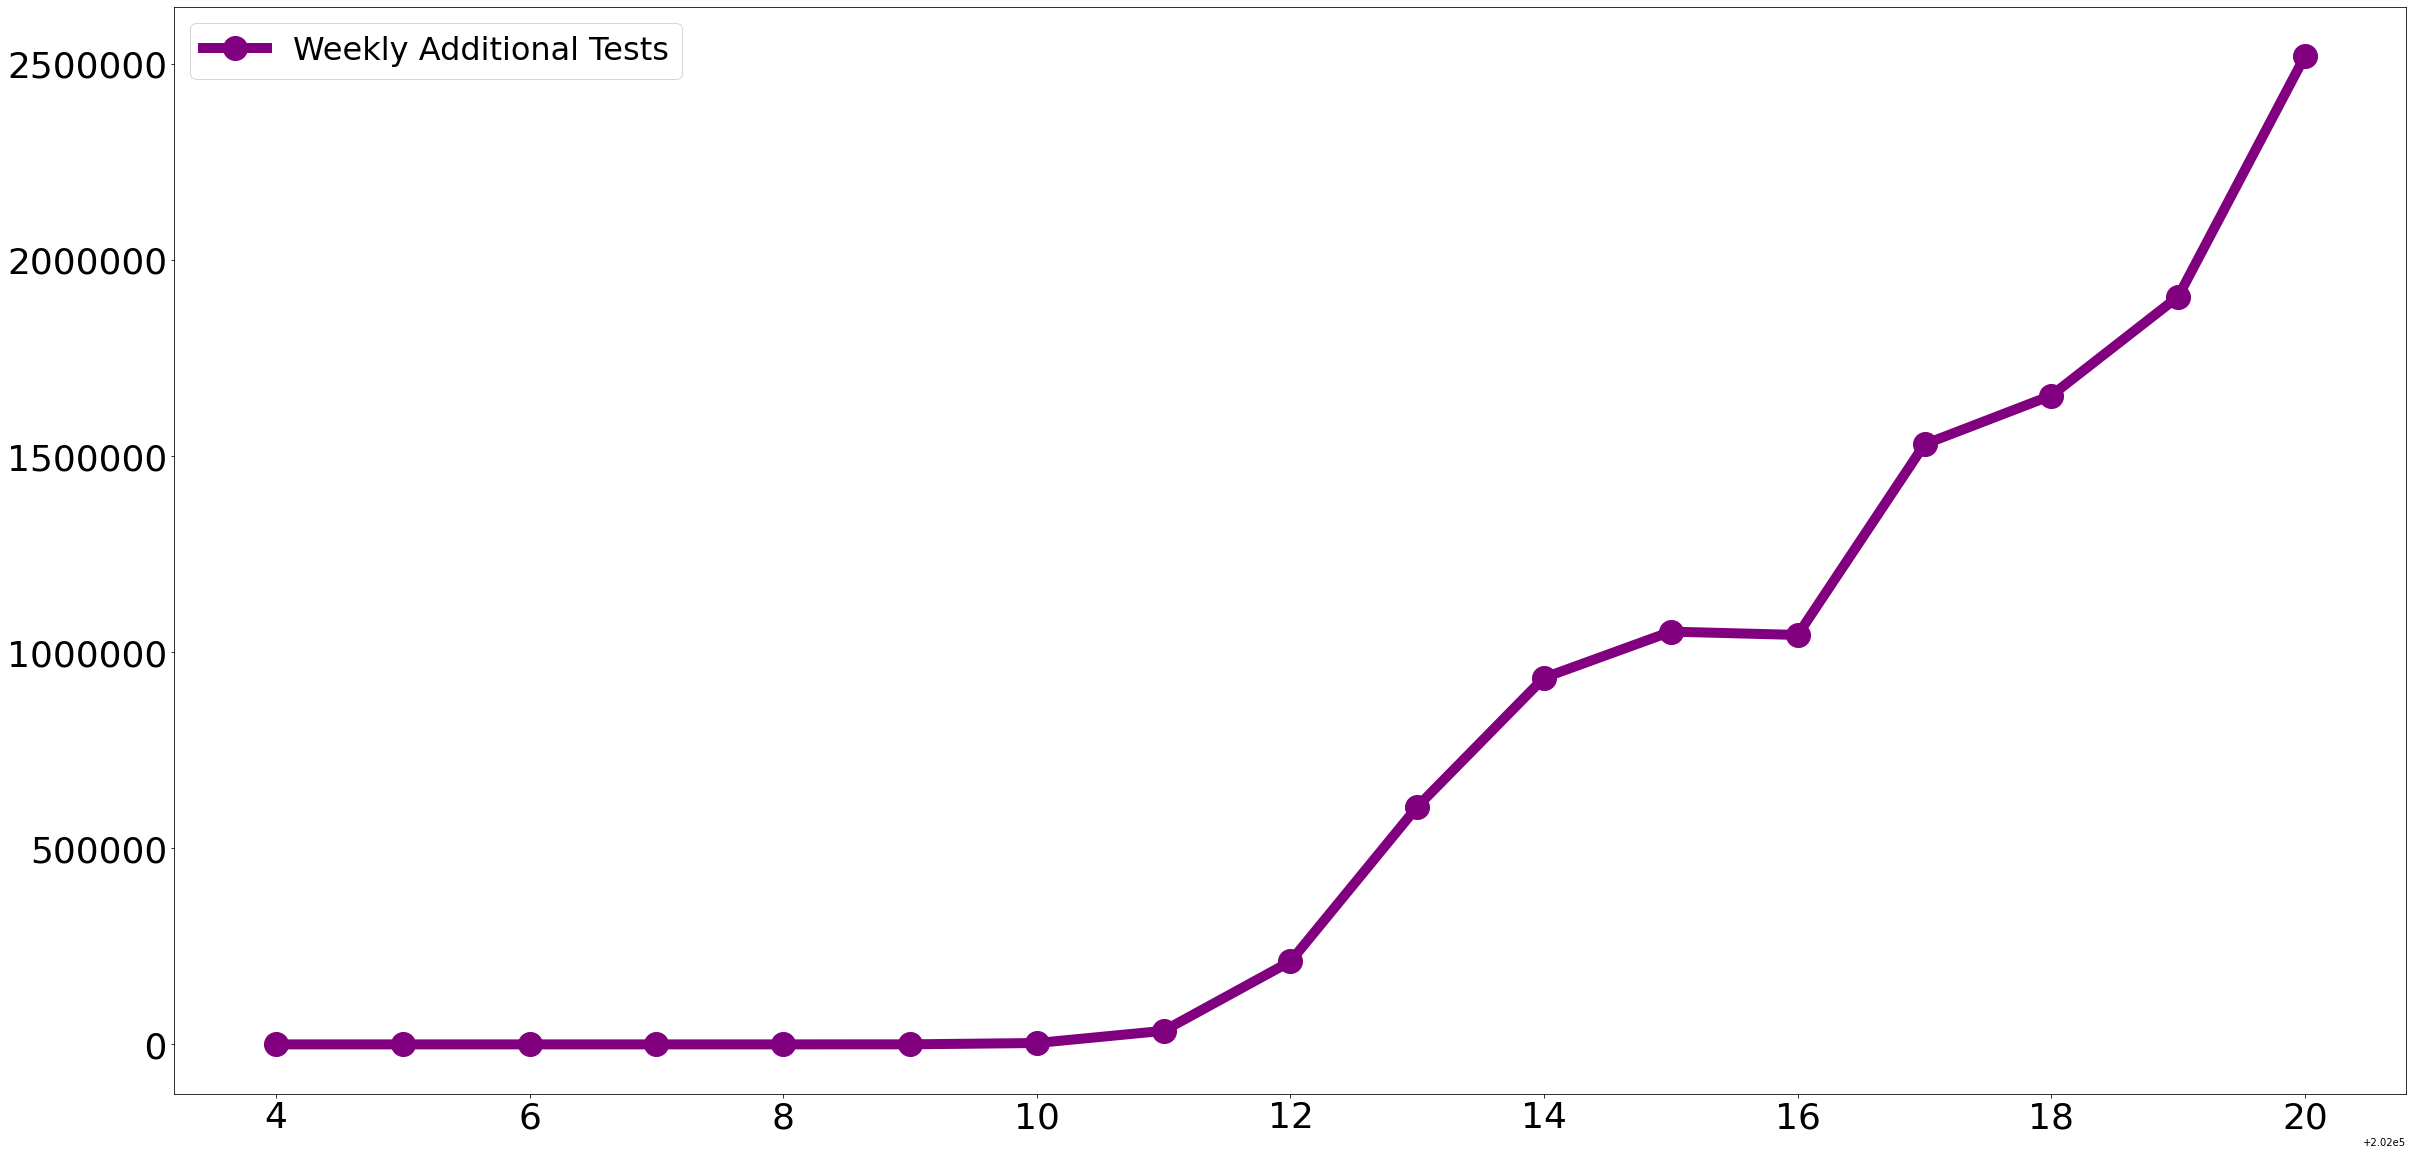

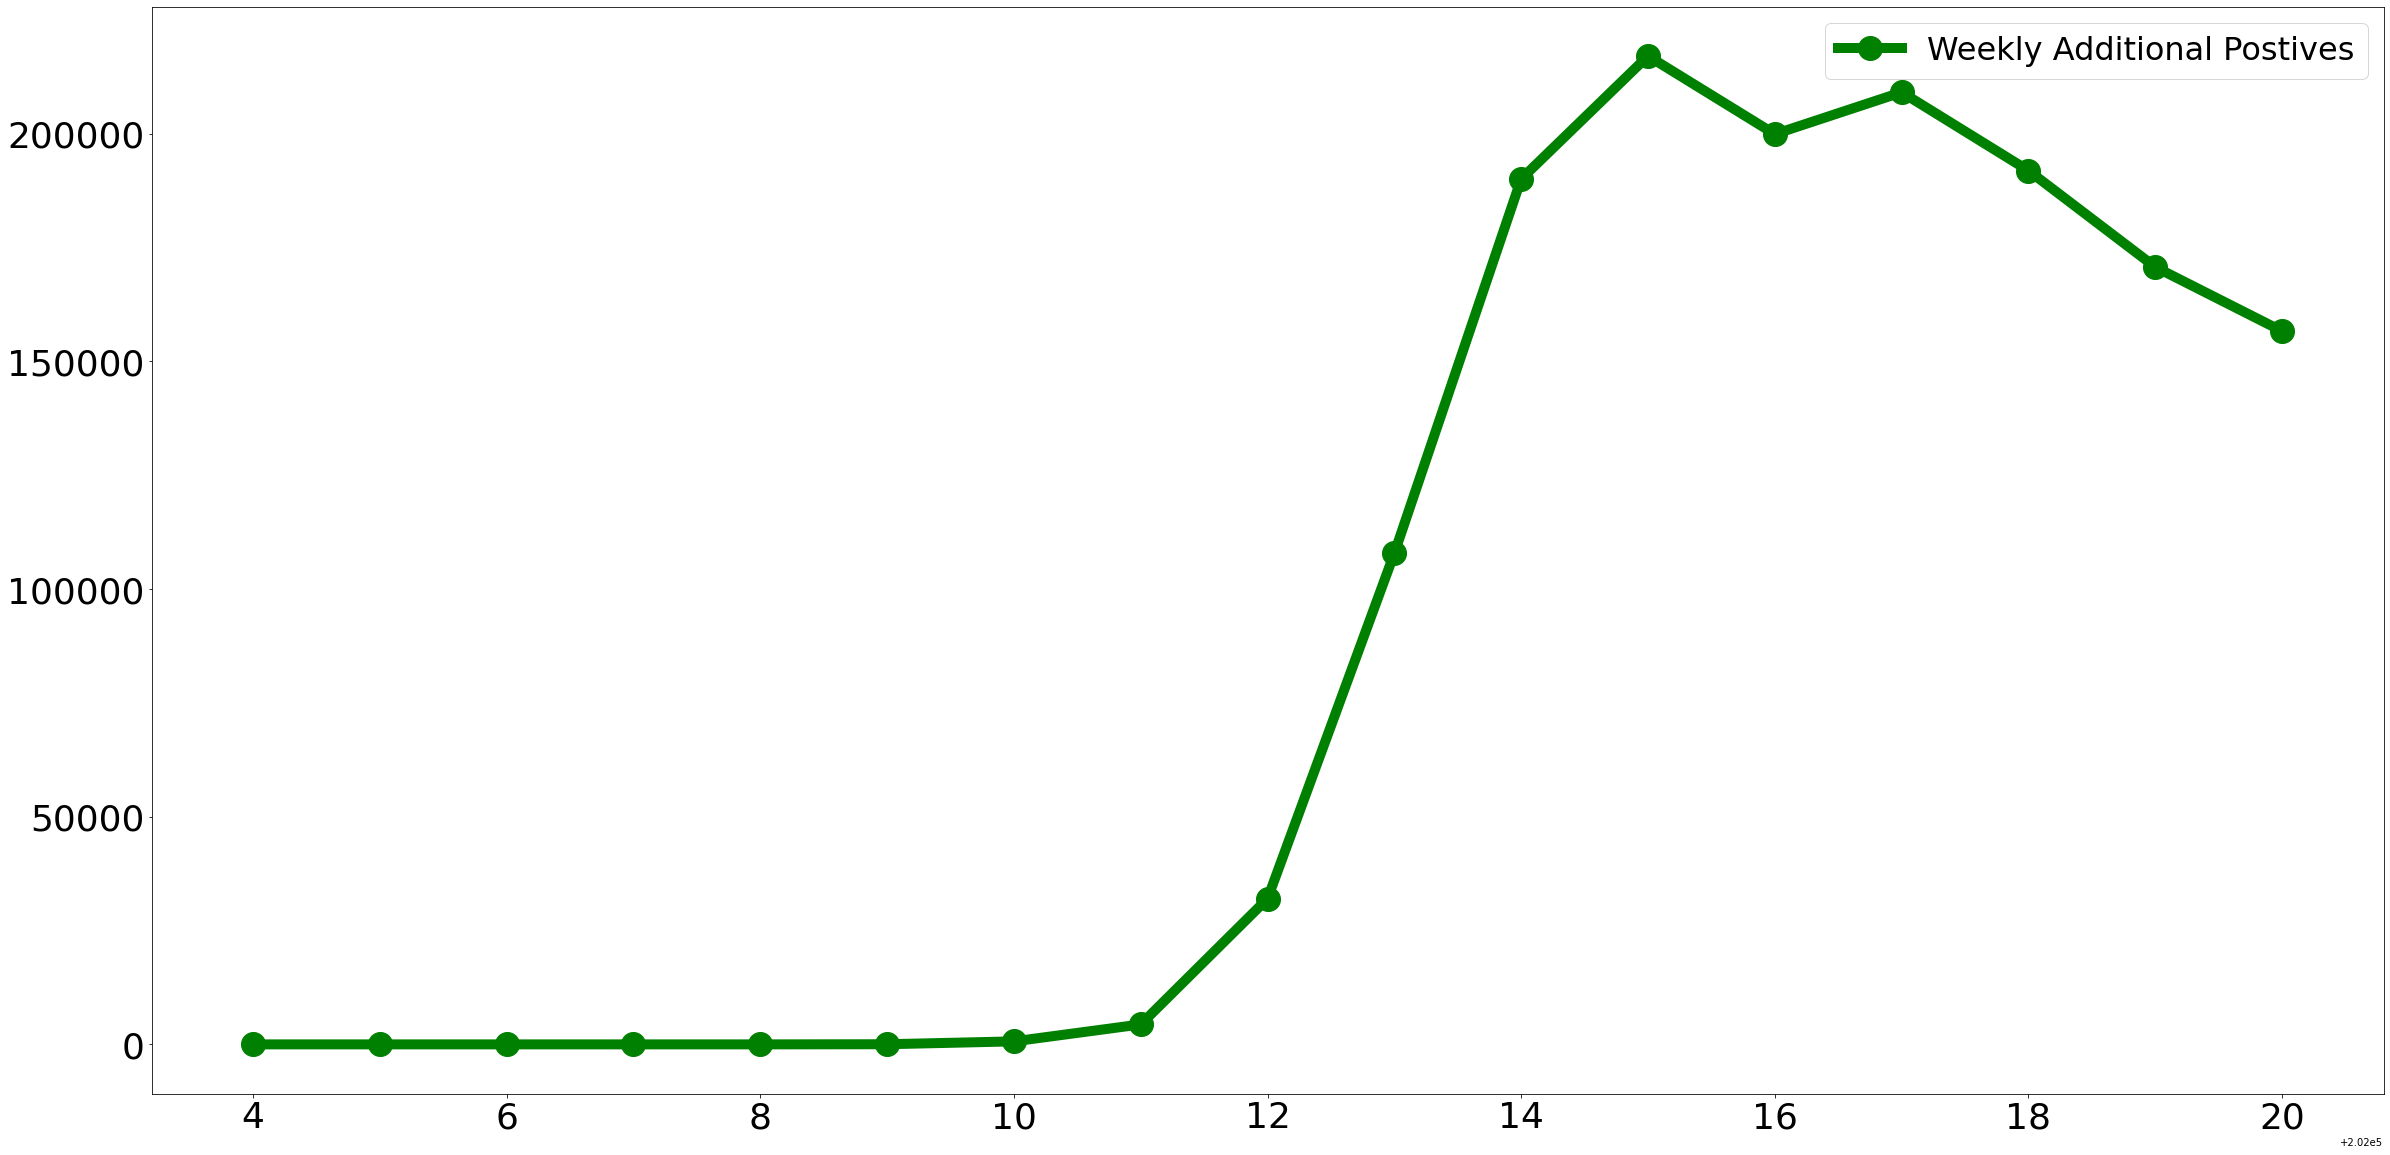

In [118]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

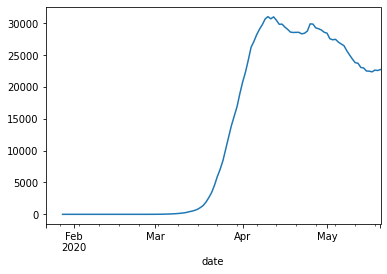

In [119]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

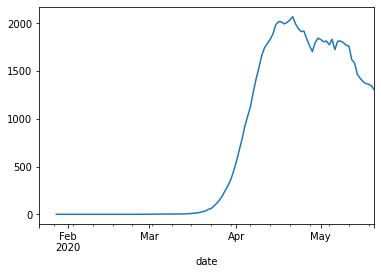

In [120]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

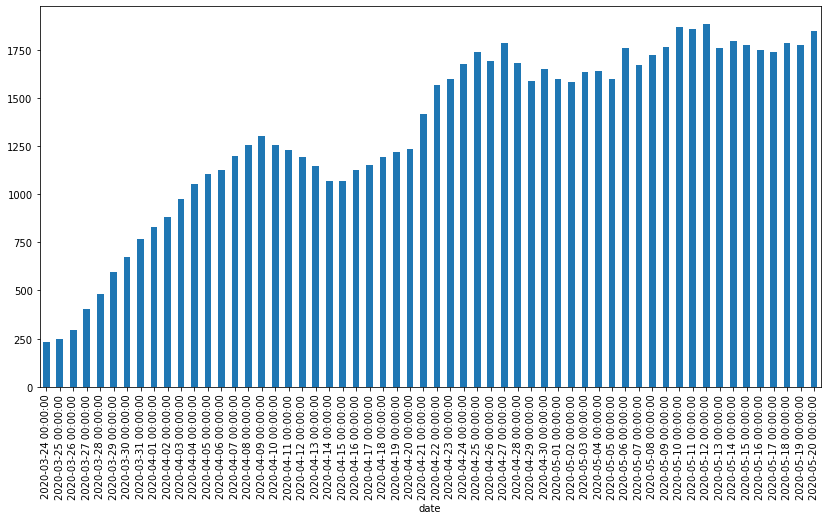

In [122]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


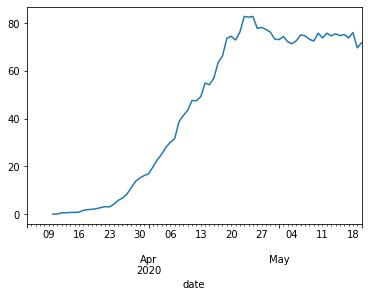

In [123]:
dfCAAvg.deathIncrease.plot.line()

In [124]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,total_positive,pct
754,FL,2020-05-20,47471,2173,47471,1.000000
755,FL,2020-05-19,46944,2129,47471,0.988898
756,FL,2020-05-18,46442,2073,47471,0.978324
757,FL,2020-05-17,45588,2049,47471,0.960334
758,FL,2020-05-16,44811,2040,47471,0.943966
759,FL,2020-05-15,43210,1991,47471,0.910240
760,FL,2020-05-14,43210,1948,47471,0.910240
761,FL,2020-05-13,42402,1898,47471,0.893219
762,FL,2020-05-12,41923,1849,47471,0.883129
763,FL,2020-05-11,40982,1805,47471,0.863306


In [125]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
1893,MN,2020-05-13,12917,638,17670,0.731013


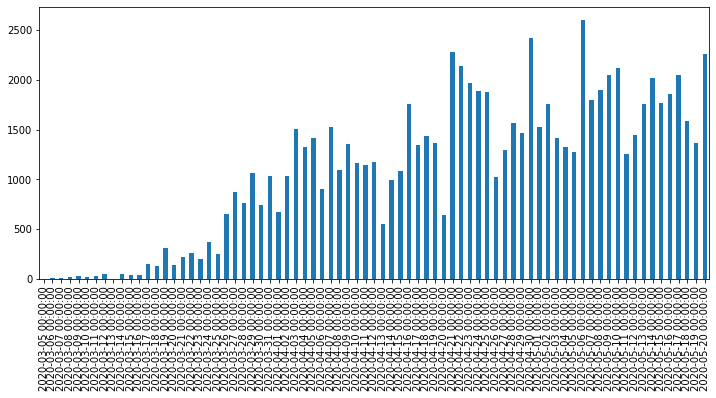

In [126]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar(figsize=(12,5))



# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [129]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1542309
negative    11105482
pending         2973
death          87472
total       12650764
dtype: int64
Current Infection Rate 12.191430%
Percentage of US affected: 0.496522%
Observed CFR: 5.671496%
Percentage of US tested/affected: 3.879869%
Projected affected by cir = 40,017,091
Projected killed = 2,269,568


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [137]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.821620,7.740670
NJ,1.693265,5.982117
MA,1.290823,7.108492
RI,1.260760,11.377425
CT,1.094358,5.349303
DC,1.069927,5.727107
DE,0.841477,4.663553
IL,0.792451,5.071986
LA,0.759681,6.151488


In [138]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 3.853220%


In [139]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [141]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18651 entries, 0 to 18650
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18587 non-null  object 
 1   location                         18651 non-null  object 
 2   date                             18651 non-null  object 
 3   total_cases                      18651 non-null  int64  
 4   new_cases                        18651 non-null  int64  
 5   total_deaths                     18651 non-null  int64  
 6   new_deaths                       18651 non-null  int64  
 7   total_cases_per_million          18281 non-null  float64
 8   new_cases_per_million            18281 non-null  float64
 9   total_deaths_per_million         18281 non-null  float64
 10  new_deaths_per_million           18281 non-null  float64
 11  total_tests                      4957 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [144]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    12233987.0
RUS     7578029.0
ITA     3171719.0
DEU     3147771.0
IND     2512388.0
          ...    
MDV       15280.0
CRI       15050.0
PRY       14646.0
ZWE       14175.0
BOL       10567.0
Name: total_tests, Length: 85, dtype: float64

In [145]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 41465385
Total tests done in USA : 12233987
How many more times has the world tested more than the US: 3.4


In [146]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-19
total_cases                                                            1508598
new_cases                                                                21841
total_deaths                                                             90353
new_deaths                                                                 791
total_cases_per_million                                                4557.66
new_cases_per_million                                                   65.984
total_deaths_per_million                                               272.968
new_deaths_per_million                                                    2.39
total_tests                                                         1.2234e+07
new_tests                                                               399479
new_tests_smoothed                                  

In [147]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-7:]

,new_cases,new_deaths
date,,
2020-05-14,20782,1746
2020-05-15,27143,1773
2020-05-16,25508,1662
2020-05-17,24487,1186
2020-05-18,18873,808
2020-05-19,21841,791
2020-05-20,19970,1568


In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state].set_index('date')\
.rolling(window=7).sum()


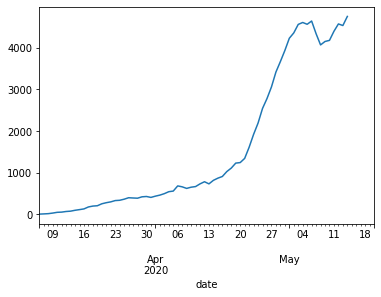

In [149]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [150]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

46944

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [152]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,280.0,859.0,39994.0,4677.0,44671.0
1,397.0,1444.0,62951.0,7143.0,70094.0
2,314.0,1647.0,55933.0,7257.0,63190.0
3,203.0,901.0,44037.0,5058.0,49095.0
4,266.0,1061.0,57529.0,6785.0,64314.0
5,148.0,928.0,51800.0,4436.0,56236.0
6,79.0,267.0,51049.0,4289.0,55338.0


# Socrata (San Francisco) Data

In [153]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [156]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [159]:
dfresDead.groupby('date').sum()

,case_count
date,
2020-03-17T00:00:00.000,1
2020-03-24T00:00:00.000,1
2020-03-26T00:00:00.000,3
2020-03-27T00:00:00.000,2
2020-03-30T00:00:00.000,1
2020-03-31T00:00:00.000,1
2020-04-01T00:00:00.000,3
2020-04-05T00:00:00.000,1
2020-04-06T00:00:00.000,1


In [160]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail()

,new_cases
date,
2020-05-14T00:00:00.000,18
2020-05-15T00:00:00.000,35
2020-05-16T00:00:00.000,31
2020-05-17T00:00:00.000,29
2020-05-18T00:00:00.000,3


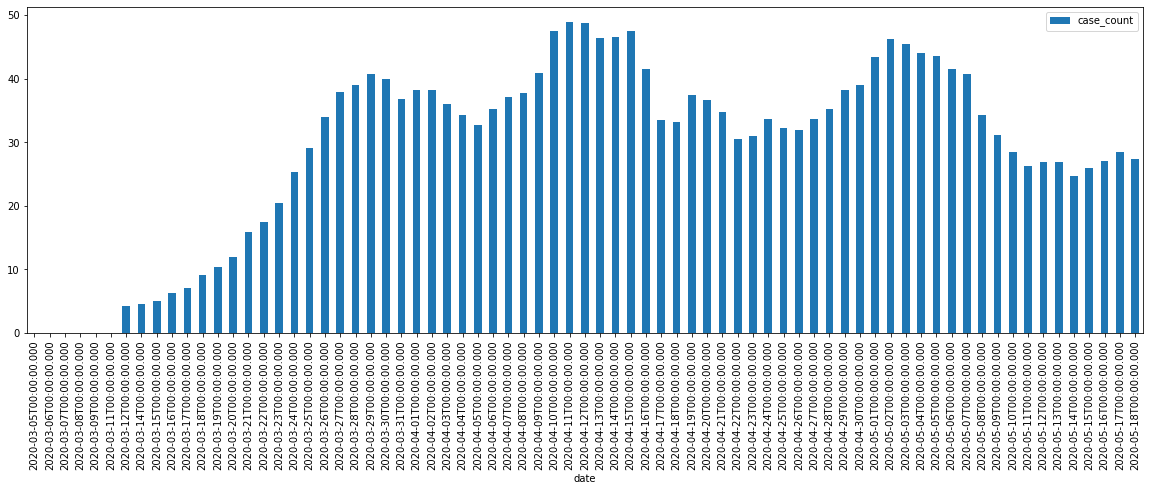

In [161]:
res.groupby('date').sum().rolling(window=7).mean().plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [190]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-16,299,14.0,9060.0,48.0,224.0
2020-05-17,317,14.0,9080.0,48.0,226.0
2020-05-18,329,14.0,9137.0,48.0,231.0
2020-05-19,336,14.0,9500.0,49.0,232.0
2020-05-20,343,14.0,9889.0,50.0,238.0


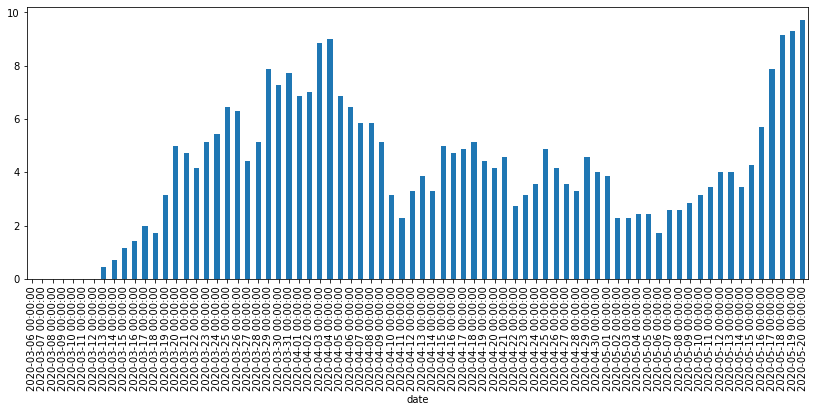

In [195]:
chart= df.positive.diff().rolling(window=7).mean().plot.bar(figsize=(14,5))

In [192]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.13%
Marin Population Tested: 3.81%


In [194]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-16    5.714286
2020-05-17    7.857143
2020-05-18    9.142857
2020-05-19    9.285714
2020-05-20    9.714286
Name: positive, dtype: float64